# Facial Expression Recognition (Emotion Detection)

In [3]:
import os
print(os.listdir('data'))

['test', 'train']


In [4]:
train_path = 'data/train'
val_path = 'data/test'

In [3]:
import matplotlib.pyplot as plt
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

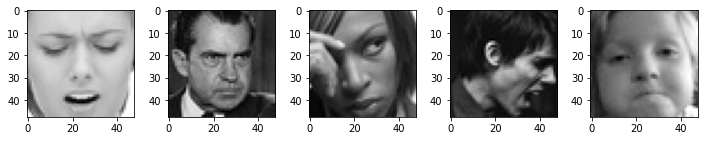

In [4]:
plot_images(train_path+'/angry')

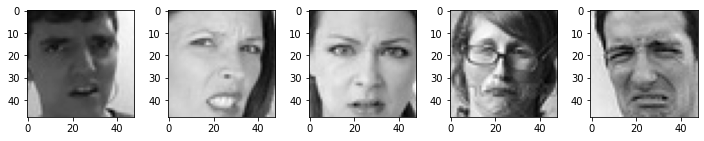

In [5]:
plot_images(train_path+'/disgust')

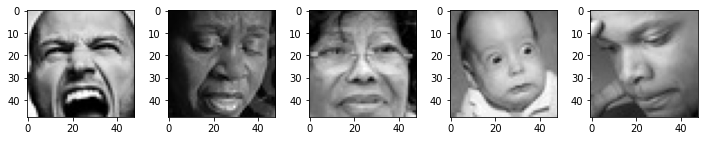

In [6]:
plot_images(train_path+'/fear')

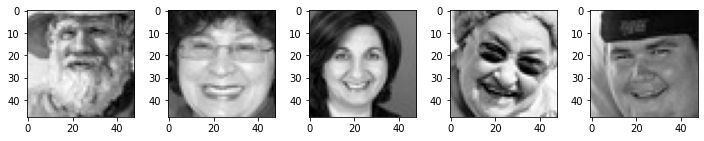

In [7]:
plot_images(train_path+'/happy')

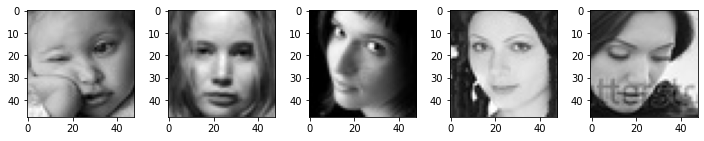

In [8]:
plot_images(train_path+'/neutral')

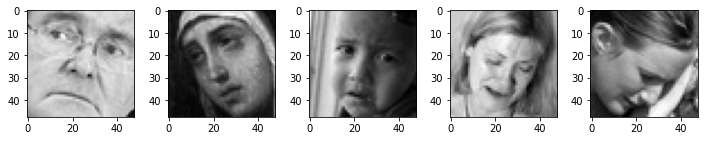

In [9]:
plot_images(train_path+'/sad')

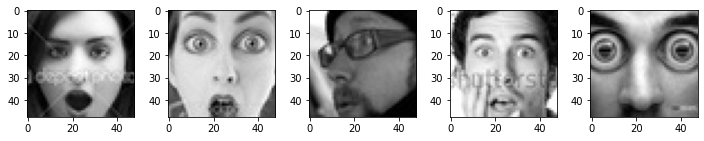

In [10]:
plot_images(train_path+'/surprise')

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers

In [12]:
emotion_labels = sorted(os.listdir(train_path))
print(emotion_labels)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


## Data Generator

In [13]:
batch_size = 64
target_size = (48,48)

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

val_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Build Model

In [14]:
input_shape = (48,48,1) # img_rows, img_colums, color_channels
num_classes = 7

In [15]:
# Build Model
model = models.Sequential()

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape, data_format='channels_last', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

In [16]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

## Train Model

In [17]:
num_epochs = 100
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VAL   = val_generator.n//val_generator.batch_size

In [18]:
# Train Model
history = model.fit_generator(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs, verbose=1, validation_data=val_generator, validation_steps=STEP_SIZE_VAL)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
448/448 [==============================] - 125s 261ms/step - loss: 2.3309 - accuracy: 0.1951 - val_loss: 1.8355 - val_accuracy: 0.2471
Epoch 2/100
448/448 [==============================] - 31s 70ms/step - loss: 1.8436 - accuracy: 0.2413 - val_loss: 1.8121 - val_accuracy: 0.2472
Epoch 3/100
448/448 [==============================] - 31s 70ms/step - loss: 1.8223 - accuracy: 0.2442 - val_loss: 1.8299 - val_accuracy: 0.2468
Epoch 4/100
448/448 [==============================] - 31s 69ms/step - loss: 1.8059 - accuracy: 0.2523 - val_loss: 1.8153 - val_accuracy: 0.2436
Epoch 5/100
448/448 [==============================] - 31s 69ms/step - loss: 1.7669 - accuracy: 0.2733 - val_loss: 1.7435 - val_accuracy: 0.3071
Epoch 6/100
448/448 [==============================] - 31s 69ms/step - loss: 1.6228 - accuracy: 0.3519 - val_loss: 1.7040 - val_accuracy: 0.3443
Epoch 7/100
448/448 [==============================] - 34s 75ms/step - loss: 1.5121 - accuracy: 0.4083 - val_loss: 1.5705 - val_

## Save Model

In [ ]:
# Save Model
models.save_model(model, 'my_model.h5') 

## Evaluate Model

In [20]:
# Evaluate Model
score = model.evaluate_generator(val_generator, steps=STEP_SIZE_VAL) 
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test loss:  1.464926838874817
Test accuracy:  0.6457868218421936


## Show Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


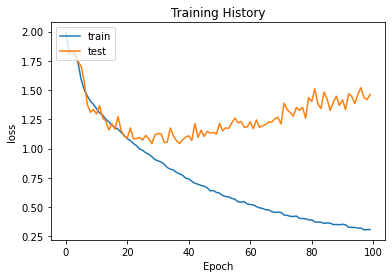

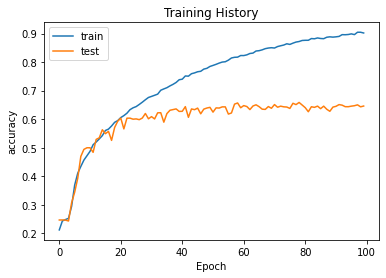

In [21]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')